# Solving the Simple Pendulum with Velocity-Verlet: Lab 3 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def rhs_pend(x):
    """
    rhs_pend: Evaluate the right hand side of the coupled (non-
        dimensional) ODEs describing the nonlinear pendulum
    
    ---INPUT:
    x - the current value of the dependent variable. For the pendulum
        ODEs x = [theta omega] where theta is the angle and omega is the
        angular velocity.
        
    ---OUTPUT:
    rhs - a row vector representing the value of the right hand side
        of the ODEs. Specifically, rhs=[omega -4*pi^2*sin(theta)].
    -------------------------------------------------------------------------------
    """
    
    rhs = np.zeros(2)
    
    theta = x[0];
    omega = x[1];
    rhs[0] = omega;
    rhs[1] = -4*np.pi**2*np.sin(theta)
    
    return rhs

In [2]:
def kepler_analytic(vel,T):

    #-------------------------------------------------------------------------------
    # Calculate the analytic trajectory for the Kepler central force problem.
    # Assumes an initial position r = (1,0), v = (0,vel).
    #-------------------------------------------------------------------------------
    # INPUTS:
    # - vel: the initial speed.
    # - T: sets an upper limit for |theta| for the e > 1 case (plot up to the
    #        integration time).
    #-------------------------------------------------------------------------------

    # Calculate trajectory from analytic solution

    ecc = np.linalg.norm(vel)**2 - 1        # Eccentricity
    a = 1/(1 - ecc)                         # Semi-major axis

    if ecc < 1:

        theta = np.linspace(0, 2*np.pi, 50) # Equally spaced values from 0 to 2*pi
        b = a * np.sqrt(1 - ecc**2)
        xan = -a * ecc + a * np.cos(theta)
        yan =  b * np.sin(theta)

    else:

        b = a * np.sqrt(ecc**2 - 1)
        theta_max = np.asinh(np.linsalg.norm(vel) * T/b) # Limit for range of theta
        that = np.linspace( -theta_max, theta_max, 50)
        xan = - a * ecc + a * np.cosh(theta)
        yan =   b * np.sinh(theta)

    return xan, yan

## <span style="color:red">Q1</span>
### Modify the code so that it also plots $\theta$ versus $t.$ Run the code and produce $\theta$ versus $t$ plots for numerical integrations from $t=0$ to $t=7$ with time steps $\tau=0.01,\,0.1,\,0.2,\,1,$ and with initial angles $\theta_1=10,\,45,\,90,\,170\,{\rm deg}.$

For which time steps, and which initial angles, is the numerical solution *reasonably accurate*?

We find accurate solution for $\tau$ = 0.01, 0.2, but inaccurate solutions for $\tau$ = 0.2, 1.

## <span style="color:red">Q2</span>
### There is some subjectivity in how you deﬁne whether a numerical solution is “reasonably accurate”.

Which of the following could be a valid way of determining whether a numerical solution of pendulum motion is accurate? 

## <span style="color:red">Q3</span>
### Velocity-Verlet Method for Pendulum Dynamics

Velocity-Verlet is the variant of the Verlet method introduced in Lecture 2. For the general dynamics problem Velocity-Verlet may be written:

$${\bf r}_{n+1}={\bf r}_n+\tau {\bf v}_{n}+\frac{1}{2}\tau^2{\bf a}_n$$

and

$$ {\bf v}_{n+1}= {\bf v}_n+\tfrac{1}{2}\tau\left({\bf a}_n+{\bf a}_{n+1}\right).$$

Using your RK4 method as a starting point, create new Python code which solves the pendulum problem using Velocity-Verlet instead of fourth-order Runge-Kutta.

*Hints*: Note that, for the pendulum ODEs the correspondence with the dynamics equations for 1-D motion with position $x$ and velocity $v$ is:

$$ x\quad \Leftrightarrow \quad \theta, $$
$$v=\frac{dx}{dt}\quad \Leftrightarrow \quad \omega=\frac{d\theta}{dt}, $$
$$a=\frac{dv}{dt}\quad \Leftrightarrow \quad \alpha = \frac{d\omega}{dt}=-4\pi^2\sin\theta.$$

Hence the Velocity-Verlet updates for the pendulum are:

$$ \theta_{n+1}=\theta_n+\tau \omega_{n}+\tfrac{1}{2}\tau^2\alpha_n$$

and

$$\omega_{n+1}= \omega_n+\frac{1}{2}\tau\left(\alpha_n+\alpha_{n+1}\right),$$

where $\alpha_n=-4\pi^2\sin\theta_n.$

When you have your Velocity-Verlet code for the pendulum problem working, repeat the calculations from 1, placing an A (accurate) or I (inaccurate) in each place in the table below:

 $\theta_1=10$ deg $\theta_1=45$ deg $\theta_1=90$ deg $\theta_1=170$ deg $\tau=0.01$        
$\tau=0.1$
       $\tau=0.2$         $\tau=1$        

Compare your table to the one you generated above for RK4. You will notice that there is a one entry that is accurate for VV but inaccurate for RK4:
Compared to RK4 (which gave an inaccurate solution), the VV method is more accurate for $\tau = 0.2$.

Compared to RK4, we find slightly more accurate solutions for $\tau = 0.2$, particularly for low initial angles, $\theta_1$: VV maintains a more constant amplitude (and hence energy) than RK4 (although the period is more distorted relative to the RK4 solution). As an example, Figure 2 shows the results for the different time steps for $\theta_1 = 90°$. The case $\tau = 0.2$ has an increasing amplitude with time, and the case $\tau = 1$ has a rapidly increasing amplitude.

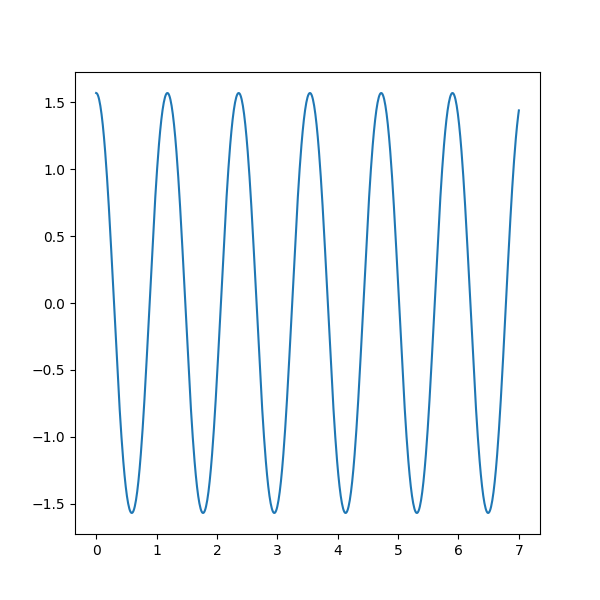

In [34]:

#-------------------------------------------------------------------------------
# Time grid parameters:
tau = 0.01 # Time step
T = 7  # Total integration time
numSteps = int(np.ceil(T/tau))  # Number of time steps

#-------------------------------------------------------------------------------
# Initial conditions
theta1 = 90  # Initial angle in degrees
theta = theta1*np.pi/180
x = np.array([theta, 0])

#-------------------------------------------------------------------------------
# Preallocate:
time = np.arange(numSteps+1)*tau

# Arrays to store pendulum positions
xPendArray = np.zeros((numSteps+1, 2))
yPendArray = np.zeros((numSteps+1, 2))

# Initial position
xPendArray[0] = [0, np.sin(x[0])]
yPendArray[0] = [0, -np.cos(x[0])]


thetas = [x[0],]
#-------------------------------------------------------------------------------
# Fourth-order Runge-Kutta integration
for n in range(numSteps):
    
    # One step of Euler
    

    w, a1 = rhs_pend(x)
    x[0] = x[0] + tau * w + 0.5 * tau * tau * a1
    _, a2 = rhs_pend(x)
    x[1] = x[1] + tau *0.5*(a1+a2)
    
    thetas.append(x[0])

    # Update the pendulum position:
    # Co-ordinates of the pendulum bar
    xPendArray[n+1] = [0, np.sin(x[0])]
    yPendArray[n+1] = [0, -np.cos(x[0])]


#-------------------------------------------------------------------------------
# Plot the results as an animation
'''
%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline

# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim([-1, 1])
ax.set_ylim([-1.2, 0.8])

# Plot pendulum paths with rainbow colors
artists = []
colors = plt.cm.jet(np.linspace(0, 1, numSteps))

for i in range(numSteps):
            
    plot,  = ax.plot(xPendArray[i], yPendArray[i], 'o-', color=colors[i]) # Plot pendulum positions
    
    title = ax.text(0, 0.85, f'Pendulum Path: t = {time[i]:.2f} s', ha='center')
    
    artists.append([plot, title])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=80, repeat=False)
plt.show()
# Change interval value to speed up or slow down animation
'''

plt.clf()
plt.plot(time, thetas)
plt.show()

## <span style="color:red">Q4</span>
### We know that RK4 is more accurate than Velocity-Verlet in each single step, but that how much of an advantage does it give it for this simple pendulum problem?

# Solving the Kepler problem with RK4
## <span style="color:red">Q5</span>

### How well does RK4 perform on the circular motion test case (initial vector ${\bf x}=[1,0,0,1]$), with the default time step ($\tau=0.05$)?

The integration appears to be quite accurate for the circular motion test case with the default time step, τ = 0.05: the analytic trajectory is followed closely, and the variation in energy is small (≈ $10^{-7}$).

In [3]:
def rhs_kepler(x):
    rcube = (x[0]**2 + x[1]**2)**1.5
    rhs = [x[2], x[3], -x[0]/rcube, -x[1]/rcube]
    return np.array(rhs)

def rk4_kepler(tau, v):
    x = [1, 0, 0, v]
    x = np.array(x)
    
    T = 2 * np.pi
    numSteps = int(np.ceil(T / tau))
    time = tau * np.arange(numSteps + 1)
    pos_x = np.zeros(numSteps + 1)
    pos_y = np.zeros(numSteps + 1)
    energy = np.zeros(numSteps + 1)
    
    pos_x[0] = x[0]
    pos_y[0] = x[1]
    speed = (x[2]**2 + x[3]**2)**0.5
    r = (x[0]**2 + x[1]**2)**0.5
    energy[0] = 0.5 * speed**2 - 1 / r
    
    for n in range(1, numSteps+1):    
        f1 = rhs_kepler(x);
        f2 = rhs_kepler(x + 0.5*tau*f1);
        f3 = rhs_kepler(x + 0.5*tau*f2);
        f4 = rhs_kepler(x + tau*f3);
        
        x = x + tau*(f1 + 2*f2 + 2*f3 + f4)/6
        
        r = (x[0]**2 + x[1]**2)**0.5
        speed = (x[2]**2 + x[3]**2)**0.5
        energy[n] = 0.5 * speed**2 - 1 / r
        pos_x[n] = x[0]
        pos_y[n] = x[1]
    
    return pos_x, pos_y, time, energy
    

<Figure size 640x480 with 0 Axes>

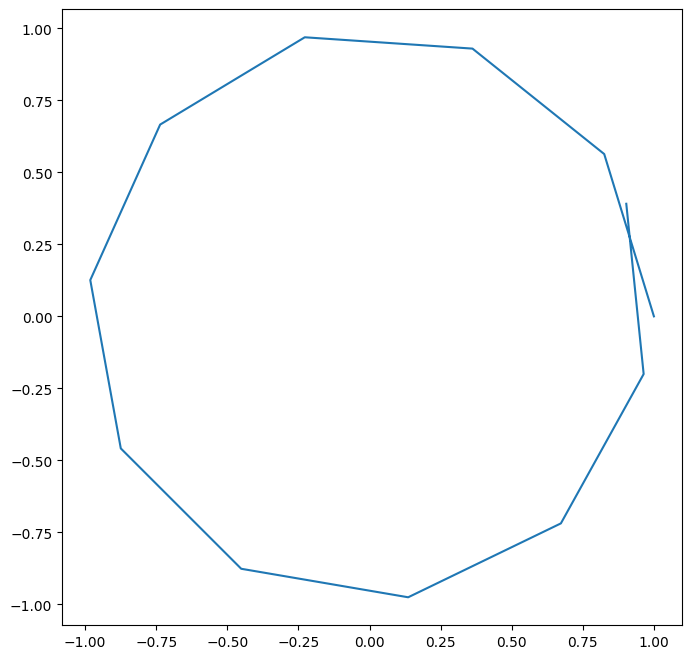

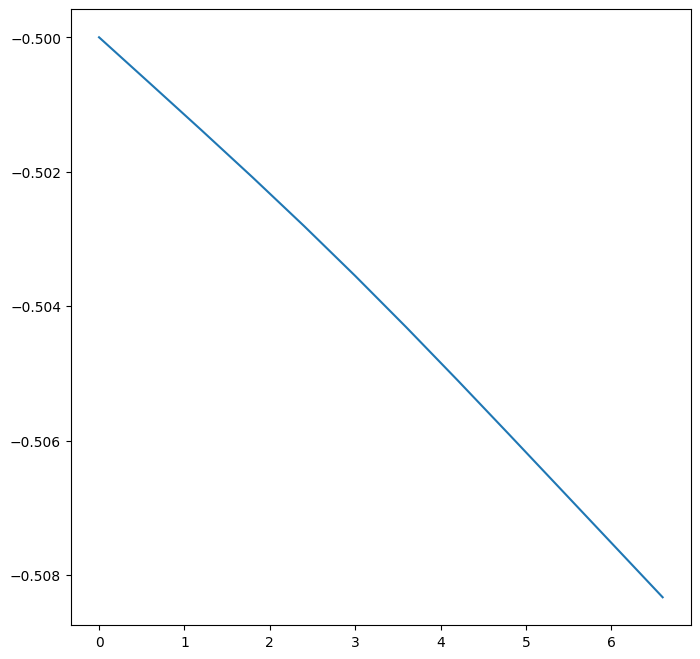

In [13]:
pos_x, pos_y, time, energy = rk4_kepler(0.6, 1)

plt.clf()
plt.figure(figsize=(8, 8))
plt.plot(pos_x, pos_y)

plt.figure(figsize=(8, 8))
plt.plot(time,energy)
plt.show()

## <span style="color:red">Q6</span>

### Apply the RK4 scheme to simulate a highly eccentric case (v₁ = 0.3).
 
Step through orders of magnitude (e.g., τ = 0.05, 0.005, ...) to identify an estimate of the largest time step, τ, which yields a reasonably accurate orbit.

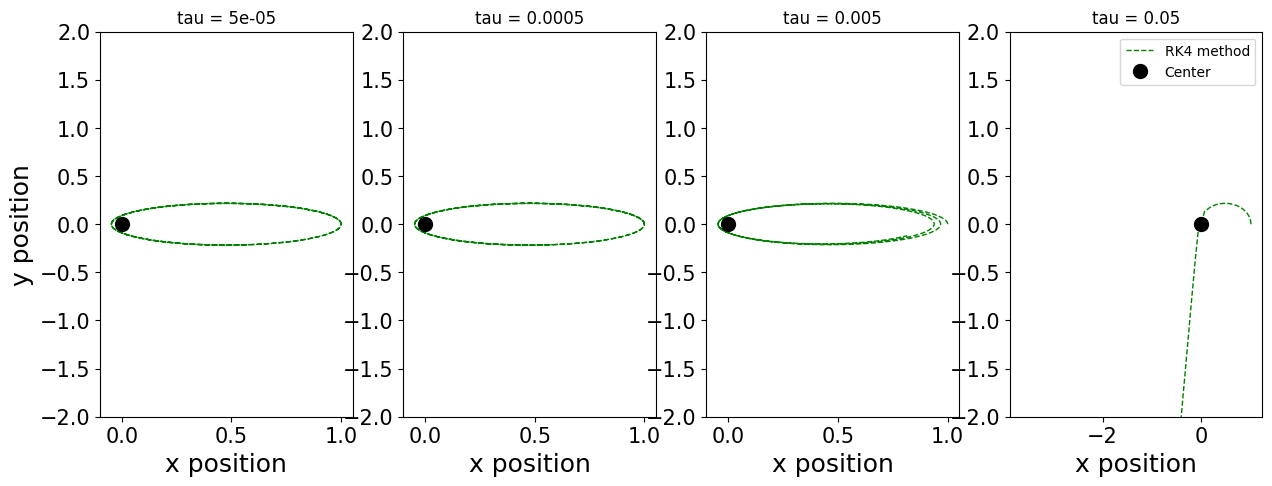

In [9]:
tau_values = [0.00005, 0.0005, 0.005, 0.05] 

# Set up figure 
fig, ax = plt.subplots(1,4, figsize=(15,5))

for i in range(4):
    
    
    pos_x, pos_y, time, energy = rk4_kepler(tau_values[i], 0.3)

    ax[i].plot(pos_x, pos_y, '--g', lw=1, label="RK4 method" if i==3 else None)
    ax[i].plot(0, 0, 'ko', markersize=10, label="Center" if i==3 else None)
    ax[i].tick_params(labelsize=15)
    ax[i].set_ylim(-2, 2)
    ax[i].set_xlabel("x position", fontsize=18)
    ax[i].set_title(f"tau = {tau_values[i]}")
    

ax[0].set_ylabel("y position", fontsize=18)
ax[3].legend(fontsize=10)


## <span style="color:red">Q7</span>

Apply the RK4 scheme to simulate a highly eccentric initial condition, $\mathbf{x}=[1,0,0,0.3]$, from Question 6.


## <span style="color:red">Q8</span>

Summarize the comparison of RK4 to the Verlet method on the Kepler problem.

## <span style="color:red">Answer</span>

The two methods have different advantages: RK4 is a bit more accurate for a given time step,
but Verlet conserves energy over an orbit.